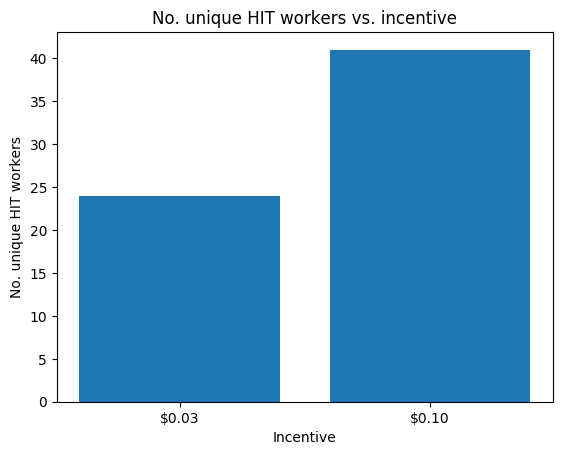

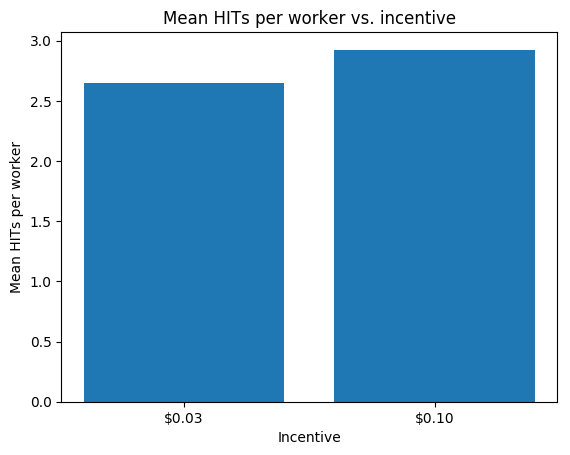

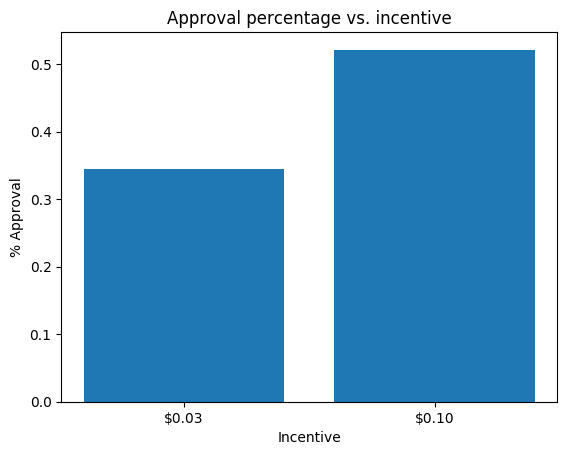

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt


# Between tencents and threecents, let's analyze the quantity of HITs done
# Let's also analyze the work quality
# Also the number of hits done per person

def quantity(comp1, comp2):
  
  label = ['$0.03', '$0.10']
  quantity = [len(comp1.WorkerId.unique()), len(comp2.WorkerId.unique())]
  
  index = np.arange(len(label))
  plt.bar(index, quantity)
  plt.xlabel('Incentive')
  plt.ylabel('No. unique HIT workers')
  plt.xticks(index, label)
  plt.title('No. unique HIT workers vs. incentive')
  plt.show()
  pass

def numHitsPerWorker(comp1, comp2):
  label = ['$0.03', '$0.10']
  quantity = [comp1.groupby('WorkerId').count()['HITId'].mean(), 
              comp2.groupby('WorkerId').count()['HITId'].mean()]
  index = np.arange(len(label))
  plt.bar(index, quantity)
  plt.xlabel('Incentive')
  plt.ylabel('Mean HITs per worker')
  plt.xticks(index, label)
  plt.title('Mean HITs per worker vs. incentive')
  plt.show()
  pass

def workQuality(comp1, comp2):
  label = ['$0.03', '$0.10']
  quantity = [(comp1.groupby('AssignmentStatus').count()['HITId'].iloc[0] / 
       (comp1.groupby('AssignmentStatus').count()['HITId'].iloc[0] +
       comp1.groupby('AssignmentStatus').count()['HITId'].iloc[1])),
       (comp2.groupby('AssignmentStatus').count()['HITId'].iloc[0] / 
       (comp2.groupby('AssignmentStatus').count()['HITId'].iloc[0] +
       comp2.groupby('AssignmentStatus').count()['HITId'].iloc[1]))]
  
  index = np.arange(len(label))
  plt.bar(index, quantity)
  plt.xlabel('Incentive')
  plt.ylabel('% Approval')
  plt.xticks(index, label)
  plt.title('Approval percentage vs. incentive')
  plt.show()
  pass
      
  
def main():
  
  comp1 = pd.read_csv('threecents.csv')
  comp2 = pd.read_csv('tencents.csv')
  quantity(comp1, comp2)
  numHitsPerWorker(comp1, comp2)
  workQuality(comp1, comp2)
    
  pass

if __name__ == '__main__':
  main()